In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

%matplotlib inline

In [2]:
plt.style.use('seaborn')

# 1. Subset Selection Methods

## Best Subset Selection

In [3]:
hitters = sm.datasets.get_rdataset('Hitters', 'ISLR').data
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [5]:
hitters.shape

(322, 20)

In [6]:
hitters['Salary'].isna().sum()

59

In [7]:
hitters = hitters.dropna()
hitters.shape

(263, 20)

In [8]:
hitters.isna().sum().sum()

0

In [9]:
X = hitters.drop(columns='Salary')

In [10]:
y = hitters['Salary']

In [11]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = smf.ols('Salary ~ ' + '+'.join(list(feature_set)), data=hitters)
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {'model': regr, 'RSS': RSS}

In [12]:
def getBest(k):
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    return best_model

__The following cell took me nearly 3 hours__

In [13]:
models_best = pd.DataFrame(columns=['RSS', 'model'])

for i in range(1,20):
    models_best.loc[i] = getBest(i)
    
models_best

,RSS,model
1,36179679.255042,<statsmodels.regression.linear_model.Regressio...
2,30646559.890373,<statsmodels.regression.linear_model.Regressio...
3,29249296.855867,<statsmodels.regression.linear_model.Regressio...
4,27970851.815816,<statsmodels.regression.linear_model.Regressio...
5,27149899.432012,<statsmodels.regression.linear_model.Regressio...
6,26194903.927595,<statsmodels.regression.linear_model.Regressio...
7,25906547.500624,<statsmodels.regression.linear_model.Regressio...
8,25136929.93896,<statsmodels.regression.linear_model.Regressio...
9,24814051.386587,<statsmodels.regression.linear_model.Regressio...
10,24500401.53774,<statsmodels.regression.linear_model.Regressio...


In [43]:
df = pd.DataFrame(
    columns=list(hitters.columns.drop('Salary'))
)

for i in range(1, 20):
    model = models_best.loc[i, 'model']
    features = model.model.exog_names
    df.loc[i] = {predictors.split('[')[0]: 1 for predictors in features[1:]}
    
df = df.fillna(0)
df = df.rename_axis('Num Predictors')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
Num Predictors,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [44]:
models_best.apply(lambda row: row[1].rsquared, axis=1)

1     0.321450
2     0.425224
3     0.451429
4     0.475407
5     0.490804
6     0.508715
7     0.514123
8     0.528557
9     0.534612
10    0.540495
11    0.542615
12    0.543630
13    0.544457
14    0.545216
15    0.545469
16    0.545766
17    0.545952
18    0.546095
19    0.546116
dtype: float64

([<matplotlib.axis.XTick at 0x1b2a2270070>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

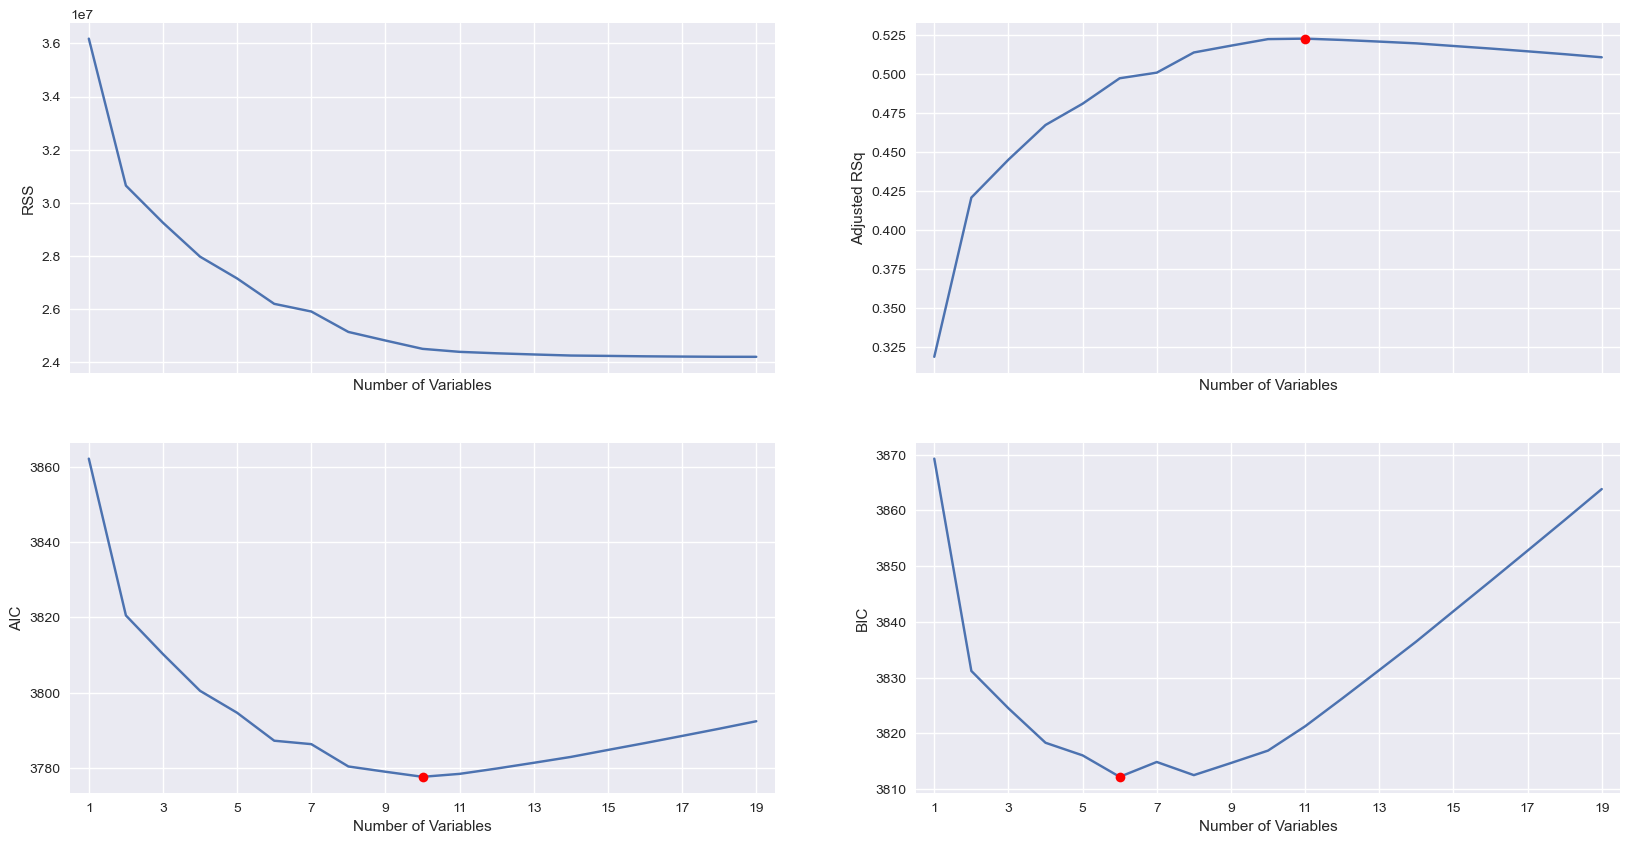

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(20,10), sharex=True)

ax[0, 0].plot(models_best['RSS'])
ax[0,0].set(xlabel='Number of Variables', ylabel='RSS')

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

ax[0, 1].plot(rsquared_adj)
ax[0, 1].plot(rsquared_adj.argmax() + 1, rsquared_adj.max(), 'or')
ax[0, 1].set(xlabel='Number of Variables', ylabel='Adjusted RSq')

aic = models_best.apply(lambda row: row[1].aic, axis=1)

ax[1, 0].plot(aic)
ax[1, 0].plot(aic.argmin() + 1, aic.min(), "or")
ax[1, 0].set(xlabel='Number of Variables', ylabel='AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

ax[1, 1].plot(bic)
ax[1, 1].plot(bic.argmin() + 1, bic.min(), "or")
ax[1, 1].set(xlabel='Number of Variables', ylabel='BIC')

plt.xlim(0.5, 19.5)
plt.xticks(ticks=range(1, 20, 2))

In [53]:
models_best.loc[6, 'model'].params

Intercept         91.511798
Division[T.W]   -122.951534
AtBat             -1.868589
Hits               7.604398
Walks              3.697647
CRBI               0.643017
PutOuts            0.264308
dtype: float64

## Forward and Backward Stepwise Selection

In [54]:
def forward(predictors):
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors + [p]))
        
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    
    return best_model

In [57]:
models_fwd = pd.DataFrame(columns=['RSS', 'model'])
predictors = []

for i in range(1, 20):
    models_fwd.loc[i] = forward(predictors)
    features = models_fwd.loc[i]['model'].model.exog_names[1:]
    predictors = [feature.split('[')[0] for feature in features]

In [59]:
df = pd.DataFrame(
    columns=list(hitters.columns.drop('Salary'))
)

for i in range(1, 20):
    model = models_fwd.loc[i, 'model']
    features = model.model.exog_names
    df.loc[i] = {predictors.split('[')[0]: 1 for predictors in features[1:]}
    
df = df.fillna(0)
df = df.rename_axis('Num Predictors')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
Num Predictors,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [63]:
def backward(predictors):
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
        
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    
    return best_model

In [70]:
models_bwd = pd.DataFrame(columns=['RSS', 'model'], 
                          index = range(1, len(X.columns)))

predictors = X.columns
while len(predictors) > 1:
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    features = models_bwd.loc[len(predictors)-1]['model'].model.exog_names[1:]
    predictors = [feature.split('[')[0] for feature in features]

models_bwd.loc[19] = getBest(19)
models_bwd

,RSS,model
1,36437950.756734,<statsmodels.regression.linear_model.Regressio...
2,31203459.57987,<statsmodels.regression.linear_model.Regressio...
3,29407297.104163,<statsmodels.regression.linear_model.Regressio...
4,28450806.992381,<statsmodels.regression.linear_model.Regressio...
5,27509524.036269,<statsmodels.regression.linear_model.Regressio...
6,26674091.920392,<statsmodels.regression.linear_model.Regressio...
7,25933487.446486,<statsmodels.regression.linear_model.Regressio...
8,25159233.850081,<statsmodels.regression.linear_model.Regressio...
9,24814051.386587,<statsmodels.regression.linear_model.Regressio...
10,24500401.53774,<statsmodels.regression.linear_model.Regressio...


In [71]:
df = pd.DataFrame(
    columns=list(hitters.columns.drop('Salary'))
)

for i in range(1, 20):
    model = models_bwd.loc[i, 'model']
    features = model.model.exog_names
    df.loc[i] = {predictors.split('[')[0]: 1 for predictors in features[1:]}
    
df = df.fillna(0)
df = df.rename_axis('Num Predictors')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
Num Predictors,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [73]:
models_best.loc[7, 'model'].params

Intercept         79.450947
Division[T.W]   -129.986643
Hits               1.283351
Walks              3.227426
CAtBat            -0.375235
CHits              1.495707
CHmRun             1.442054
PutOuts            0.236681
dtype: float64

In [74]:
models_fwd.loc[7, 'model'].params

Intercept        109.787306
Division[T.W]   -127.122393
CRBI               0.853762
Hits               7.449877
PutOuts            0.253340
AtBat             -1.958885
Walks              4.913140
CWalks            -0.305307
dtype: float64

In [75]:
models_bwd.loc[7, 'model'].params

Intercept        105.648749
Division[T.W]   -116.169217
AtBat             -1.976284
Hits               6.757491
Walks              6.055869
CRuns              1.129309
CWalks            -0.716335
PutOuts            0.302885
dtype: float64

## Choosing Among Models Using the Validation-Set Approach and Cross-Validation

In [76]:
np.random.seed(1)
train = np.random.choice([True, False], size=hitters.shape[0])
test = ~train

In [78]:
X_train = X.loc[train]
X_test = X.loc[test]
y_train = y.loc[train]
y_test = y.loc[test]

In [79]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = smf.ols('Salary ~ ' + '+'.join(list(feature_set)), 
                    data=hitters.loc[train])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {'model': regr, 'RSS': RSS}

In [80]:
def getBest(k):
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    return best_model

In [81]:
# There's no way that I'm gonna run it again
models_best = pd.DataFrame(columns=['RSS', 'model'])

for i in range(1,20):
    models_best.loc[i] = getBest(i)
    
models_best

KeyboardInterrupt: 

# 2. Ridge Regression and the Lasso

In [83]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [182]:
X_ = (
    pd.get_dummies(X, columns=X.select_dtypes('object').columns)
    .astype('float64')
)

In [183]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Alan Ashby,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,...,375.0,632.0,43.0,10.0,0.0,1.0,0.0,1.0,0.0,1.0
-Alvin Davis,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,...,263.0,880.0,82.0,14.0,1.0,0.0,0.0,1.0,1.0,0.0
-Andre Dawson,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,...,354.0,200.0,11.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0
-Andres Galarraga,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,...,33.0,805.0,40.0,4.0,0.0,1.0,1.0,0.0,0.0,1.0
-Alfredo Griffin,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,...,194.0,282.0,421.0,25.0,1.0,0.0,0.0,1.0,1.0,0.0


## Ridge Regression

In [184]:
alphas = 10**np.linspace(10, -2, 100)

In [185]:
ridge = Ridge()
coefs = []
X_transformed = scale(X_)

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_transformed, y)
    coefs.append(np.r_[ridge.intercept_, ridge.coef_])
    
np.shape(coefs)

(100, 23)

In [186]:
alphas[49]

11497.569953977356

In [187]:
coefs[49]

array([ 5.35925882e+02,  3.49258593e+00,  3.94964358e+00,  2.98279111e+00,
        3.75062468e+00,  3.97773167e+00,  3.98915841e+00,  3.46053260e+00,
        4.61659611e+00,  4.84749830e+00,  4.62514711e+00,  4.96826052e+00,
        5.00832166e+00,  4.27368415e+00,  2.83705462e+00,  2.35780502e-01,
       -6.95729807e-02,  3.45393748e-02, -3.45393748e-02,  1.83676226e+00,
       -1.83676226e+00, -4.79462083e-02,  4.79462083e-02])

In [188]:
np.sqrt((coefs[49][1:] ** 2).sum())

15.606768905086849

In [189]:
alphas[59]

705.4802310718645

In [190]:
coefs[59]

array([535.92588213,  16.46842291,  24.06832249,  11.68703923,
        20.6756484 ,  19.90427744,  23.7581659 ,  13.46803588,
        22.49015188,  25.83677777,  24.04482176,  26.38492395,
        26.84350446,  18.75248311,  24.55576245,   1.61102144,
        -2.64568574,  -3.17230831,   3.17230831,  15.42013143,
       -15.42013143,  -2.12582457,   2.12582457])

In [191]:
np.sqrt((coefs[59][1:] ** 2).sum())

84.81615953079354

In [192]:
X_train, X_test , y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.5, random_state=1
)

In [193]:
X_train

array([[-1.29665114, -1.03973056, -0.87178322, ...,  0.98116592,
         0.9301872 , -0.9301872 ],
       [ 0.7233875 ,  0.40344855, -1.10060456, ...,  0.98116592,
        -1.07505242,  1.07505242],
       [ 1.62118245,  2.29068277,  0.2723235 , ...,  0.98116592,
        -1.07505242,  1.07505242],
       ...,
       [-0.14720155,  0.24802926,  0.15791283, ...,  0.98116592,
        -1.07505242,  1.07505242],
       [-0.9565773 , -0.83990576, -1.21501523, ..., -1.01919561,
        -1.07505242,  1.07505242],
       [ 0.36290922, -0.15162034,  0.2723235 , ...,  0.98116592,
         0.9301872 , -0.9301872 ]])

In [195]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X_.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

AtBat         -213.071710
Hits           191.017973
HmRun          -53.833447
Runs             0.722535
RBI             77.085799
Walks           89.780396
Years          -27.395528
CAtBat        -120.651336
CHits           89.347178
CHmRun          84.244612
CRuns           98.424952
CRBI           116.449919
CWalks         -40.749489
PutOuts        117.498814
Assists         26.747166
Errors         -19.475661
League_A       -20.118269
League_N        20.118269
Division_E      30.684114
Division_W     -30.684114
NewLeague_A     11.333587
NewLeague_N    -11.333587
dtype: float64
102464.01360856697


In [197]:
((y_test - y_train.mean()) ** 2).mean()

172862.23592080918

In [198]:
ridge3 = Ridge(alpha = 10**10)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X_.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

AtBat          2.514813e-06
Hits           2.912660e-06
HmRun          1.986276e-06
Runs           2.685289e-06
RBI            3.189361e-06
Walks          3.118248e-06
Years          2.473459e-06
CAtBat         3.257461e-06
CHits          3.480687e-06
CHmRun         3.711503e-06
CRuns          3.474689e-06
CRBI           3.938490e-06
CWalks         3.029160e-06
PutOuts        3.055508e-06
Assists       -4.753637e-08
Errors         1.674891e-07
League_A       1.638619e-07
League_N      -1.638619e-07
Division_E     1.015342e-06
Division_W    -1.015342e-06
NewLeague_A    1.328587e-07
NewLeague_N   -1.328587e-07
dtype: float64
172862.21994771797


In [199]:
ridge4 = Ridge(alpha = 0)
ridge4.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge4.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X_.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

AtBat         -213.071710
Hits           191.017973
HmRun          -53.833447
Runs             0.722535
RBI             77.085799
Walks           89.780396
Years          -27.395528
CAtBat        -120.651336
CHits           89.347178
CHmRun          84.244612
CRuns           98.424952
CRBI           116.449919
CWalks         -40.749489
PutOuts        117.498814
Assists         26.747166
Errors         -19.475661
League_A       -20.118269
League_N        20.118269
Division_E      30.684114
Division_W     -30.684114
NewLeague_A     11.333587
NewLeague_N    -11.333587
dtype: float64
116661.81864571171


In [200]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv=10)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

75.64633275546291

In [201]:
ridge2 = Ridge(alpha = ridgecv.alpha_)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(mean_squared_error(y_test, pred2)) 

99805.76163830434


In [202]:
ridge2.fit(X_transformed, y)
pd.Series(ridge2.coef_, index=X_.columns)

AtBat          -7.249361
Hits           55.588539
HmRun          -3.283021
Runs           29.048759
RBI            21.759446
Walks          44.156522
Years          -8.065160
CAtBat         23.921494
CHits          48.963405
CHmRun         41.643844
CRuns          49.245618
CRBI           51.847815
CWalks         -3.721426
PutOuts        60.347336
Assists         9.069226
Errors        -15.659753
League_A      -10.599587
League_N       10.599587
Division_E     29.175605
Division_W    -29.175605
NewLeague_A     0.876201
NewLeague_N    -0.876201
dtype: float64

## The Lasso

Text(0, 0.5, 'weights')

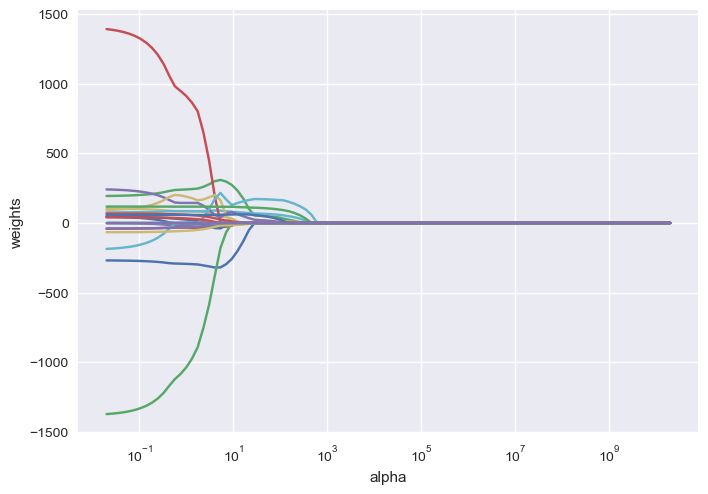

In [203]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
fig, ax = plt.subplots()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [204]:
lassocv = LassoCV(cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

105121.06327904538

In [206]:
lassocv.alpha_

28.038544563299848

In [207]:
pd.Series(lasso.coef_, index=X_.columns)

AtBat            0.000000
Hits            47.417582
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           64.015661
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          16.243847
CRuns            0.000000
CRBI           168.983385
CWalks           0.000000
PutOuts        104.196395
Assists         -0.000000
Errors          -0.000000
League_A        -0.000000
League_N         0.000000
Division_E      43.965512
Division_W      -0.000000
NewLeague_A     -0.000000
NewLeague_N      0.000000
dtype: float64

# 3. PCR and PLS Regression

## Principal Components Regression

In [209]:
hitters.reset_index(drop=True, inplace=True)

In [226]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression

In [211]:
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])

In [213]:
y = hitters.Salary

In [215]:
X_ = hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [217]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
3,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
4,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
259,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
260,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
261,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [218]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [219]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.198290,-0.383784,0.088626,0.031967,0.028117,-0.070646
1,0.195861,-0.377271,0.074032,0.017982,-0.004652,-0.082240
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660,-0.149646
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536,-0.136660
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299,-0.111675


([<matplotlib.axis.XTick at 0x1b301ba5820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

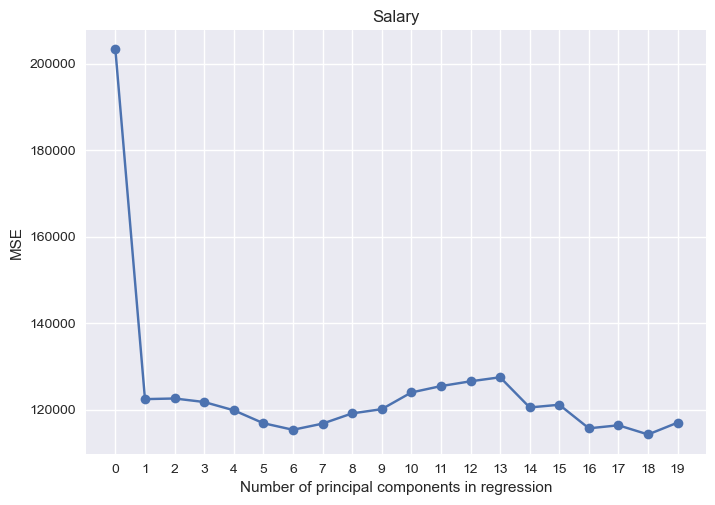

In [232]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), 
                           cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), 
                               cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)
plt.xticks(range(0, 20))

In [234]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([38.31, 60.15, 70.84, 79.03, 84.29, 88.63, 92.26, 94.96, 96.28,
       97.25, 97.97, 98.64, 99.14, 99.46, 99.73, 99.88, 99.95, 99.98,
       99.99])

([<matplotlib.axis.XTick at 0x1b301d879d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

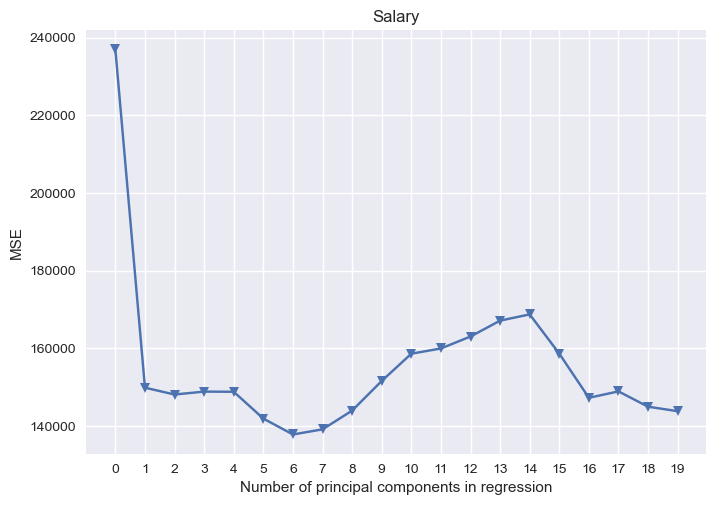

In [236]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)
plt.xticks(range(0, 20))

In [237]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

111994.42273636987

## Partial Least Squares

([<matplotlib.axis.XTick at 0x1b2f920c940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

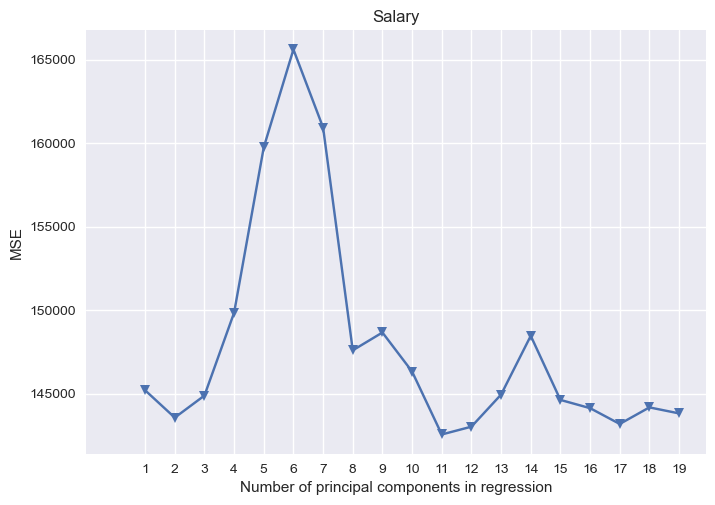

In [240]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)
plt.xticks(range(1, 20))

In [241]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

104838.51042760804